# Heart Disease DataSet

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

# Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [3]:
columnnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

attributes given

# Loading Dataset

In [4]:
df=pd.read_csv('heartdisease.csv',names=columnnames)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [5]:
df.head()#first 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [6]:
df.shape

(200, 14)

we have 200 rows and 14 columns.

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64


1    194
0      6
Name: sex, dtype: int64


4    131
3     47
2     14
1      8
Name: cp, dtype: int64


?      56
120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
126     4
134     4
124     4
136     4
144     4
170     4
128     4
132     3
158     3
112     2
125     2
154     2
180     2
116     2
152     2
138     2
155     2
104     2
135     1
172     1
96      1
127     1
178     1
118     1
156     1
100     1
146     1
102     1
106     1
190     1
114     1
0       1
Name: trestbps, dtype: int64


0      49
?       7
203     4
220     4
258     4
       ..
161     1
385    

value count per columns

In [11]:
df.isnull().sum()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130.0,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132.0,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142.0,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110.0,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,130.0,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,130.0,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


# Data cleaning

replaced all '?' values present in dataset

replaced values with median of data present

In [13]:
df['chol'].replace({np.nan: df['chol'].median()},inplace=True)

df['fbs'].replace({np.nan: df['fbs'].median()},inplace=True)

df['thalach'].replace({np.nan:df['thalach'].median()},inplace=True)

df['exang'].replace({np.nan: df['exang'].median()},inplace=True)

df['oldpeak'].replace({np.nan: df['oldpeak'].median()},inplace=True)

df['slope'].replace({np.nan: df['slope'].median()},inplace=True)

df['ca'].replace({np.nan: df['ca'].median()},inplace=True)

df['thal'].replace({np.nan: df['thal'].median()},inplace=True)

In [15]:
df['trestbps'].replace({np.nan: df['trestbps'].median()},inplace=True)

In [16]:
df['chol'].replace({0: df['chol'].median()},inplace=True)

 filled the chol=cholestrol null value with the median value
converted the nan values with its median values in all the missing columns    

In [17]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [18]:
#changing the columns Dtypes 'object' to 'float64'
df[['trestbps', 'chol', 'thalach', 'oldpeak']]=df[['trestbps', 'chol', 'thalach', 'oldpeak']].astype('float64')

In [19]:
#changing the columns Dtypes 'object' to 'int64'
df[['exang','fbs','slope', 'ca', 'thal']]=df[['exang', 'fbs', 'slope', 'ca', 'thal']].astype('int64')

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0,1,112.0,1,3.0,2,0,7,2
1,44,1,4,130.0,209.0,0,1,127.0,0,0.0,2,0,7,0
2,60,1,4,132.0,218.0,0,1,140.0,1,1.5,3,0,7,2
3,55,1,4,142.0,228.0,0,1,149.0,1,2.5,1,0,7,1
4,66,1,3,110.0,213.0,1,2,99.0,1,1.3,2,0,7,0


In [21]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


treated all nan values and converted data according to analysis.

# Explaroraty Data Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int64  
 11  ca        200 non-null    int64  
 12  thal      200 non-null    int64  
 13  num       200 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 21.9 KB


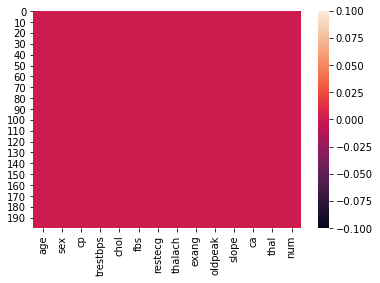

In [23]:
#plot the heat map for null values

sns.heatmap(df.isnull())
plt.show()

# Statistical summary

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,132.710000,232.970000,0.340000,0.735000,122.055000,0.740000,1.371000,2.065000,0.0,6.880000,1.520000
std,7.811697,0.171015,0.795701,18.335947,45.989392,0.474898,0.683455,18.876269,0.439735,0.941216,0.471046,0.0,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,100.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,216.000000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.0,7.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


observations:
Standard Deviation is max. for the cholestrol ('chol').
Min. age is 35 and max. age is 77.
I also observe that in the dataset we have only male patient details not female patients.
Resting Blood Pressure ('trestbps') 50% is 130,75% is 140 and 100% is 190 which clearly indicatesthat there are outliers in this column
cholestrol ('chol') there is a huge difference between 75% and 100% which clearly indicates
that we have outliers present in this column also.
I see that all the values in no. of major vessels 'ca' is 0, so we can drop this column because it will have no contribution in our analysis 


In [25]:
df.drop(['ca'],inplace=True,axis=1)


In [26]:
df.corr()#checking correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
age,1.000000,0.034230,-0.038280,0.179566,0.052413,0.135728,0.002400,-0.150146,0.129027,0.156191,0.107135,0.106313,0.287289
sex,0.034230,1.000000,0.038036,0.008429,-0.164320,-0.059400,0.060621,-0.004156,0.029402,0.100713,0.086709,-0.035898,0.147470
cp,-0.038280,0.038036,1.000000,0.094128,0.116041,-0.044416,0.034790,-0.108585,0.089904,0.015627,0.059460,-0.009430,0.168210
trestbps,0.179566,0.008429,0.094128,1.000000,0.047049,0.185084,0.088871,-0.005253,0.173210,0.103139,0.088883,0.056751,0.145444
chol,0.052413,-0.164320,0.116041,0.047049,1.000000,0.146344,-0.033988,-0.038840,0.054776,-0.003724,0.042308,-0.050377,0.107357
fbs,0.135728,-0.059400,-0.044416,0.185084,0.146344,1.000000,0.170616,0.033219,-0.176144,-0.096999,-0.009435,-0.033036,0.048940
restecg,0.002400,0.060621,0.034790,0.088871,-0.033988,0.170616,1.000000,0.010094,-0.063203,-0.102623,-0.039881,0.020460,-0.032800
thalach,-0.150146,-0.004156,-0.108585,-0.005253,-0.038840,0.033219,0.010094,1.000000,-0.093316,0.171803,-0.101567,-0.185506,-0.073072
exang,0.129027,0.029402,0.089904,0.173210,0.054776,-0.176144,-0.063203,-0.093316,1.000000,0.315578,0.106259,0.150467,0.206541
oldpeak,0.156191,0.100713,0.015627,0.103139,-0.003724,-0.096999,-0.102623,0.171803,0.315578,1.000000,0.284230,0.166723,0.366526


<AxesSubplot:>

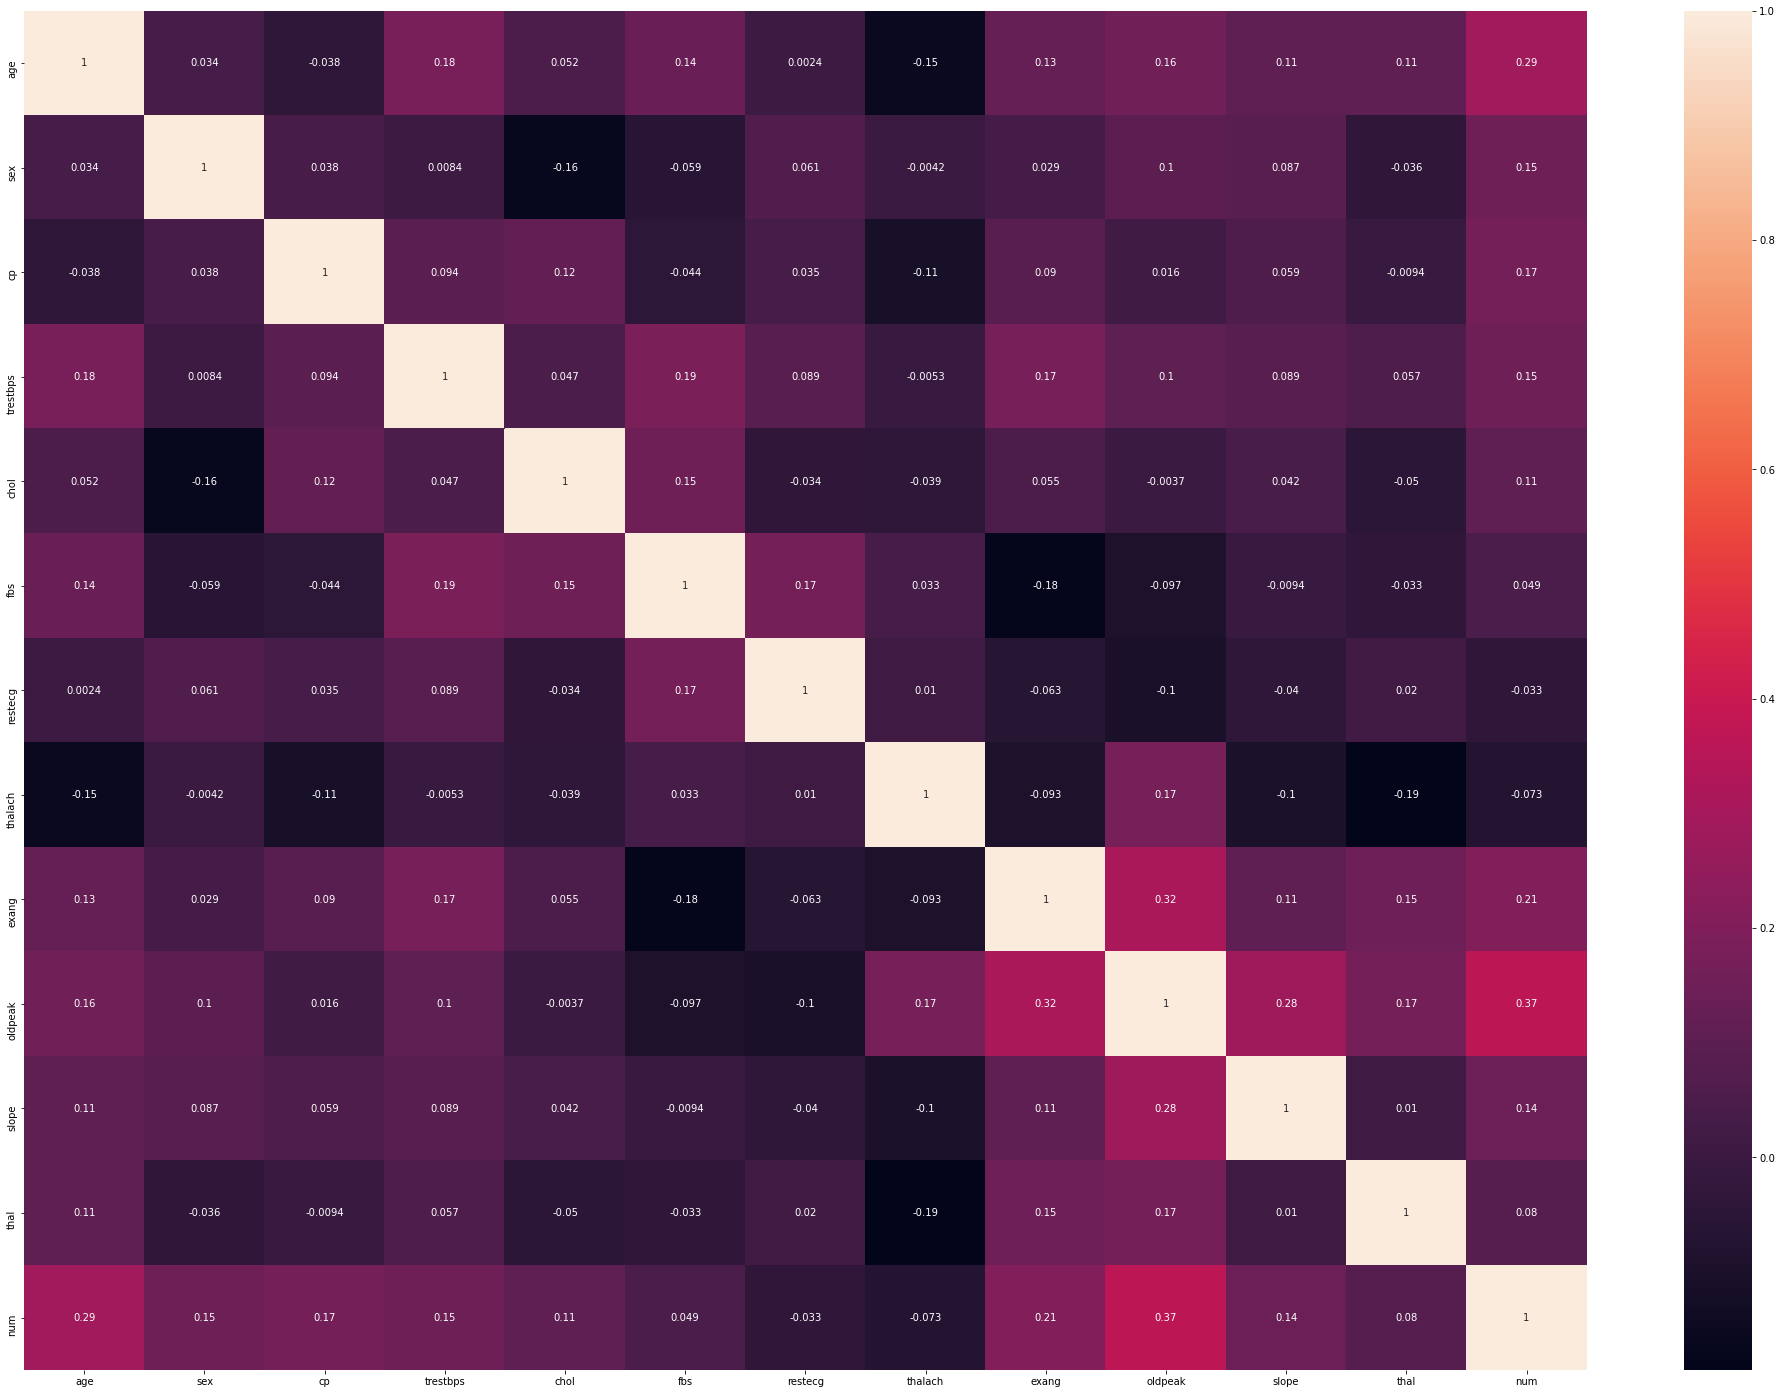

In [28]:
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(),annot=True)

Chest pain ('cp'), Maximum heart rate ('thalach') is negatively corelated with the age

oldpeak is negatively corelated with cholestoral ('chol')

# univariate analysis

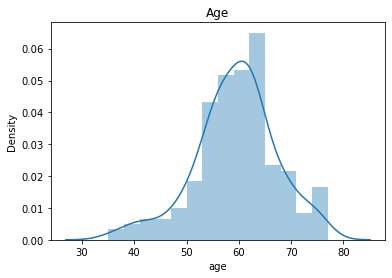

In [30]:
sns.distplot(df["age"])
plt.title("Age")
plt.show()

<AxesSubplot:>

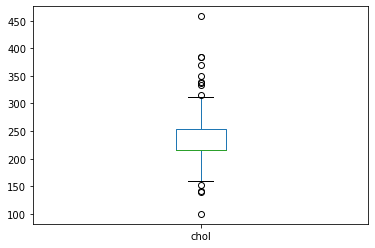

In [31]:
df['chol'].plot.box()

outliers are present in theses columns

<AxesSubplot:>

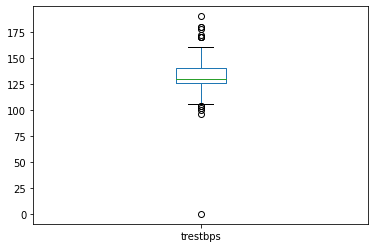

In [32]:
df['trestbps'].plot.box()

some outliers are present here also.

<AxesSubplot:xlabel='sex', ylabel='count'>

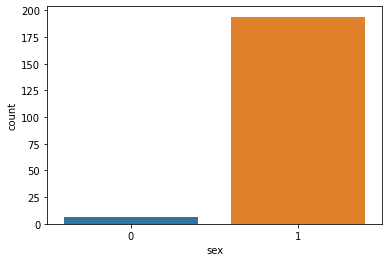

In [35]:
sns.countplot(df['sex'])

0 is showing females count and 1 is showing males 

# Bivariate analysis

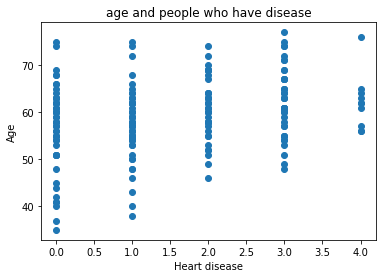

In [36]:
plt.xlabel("Heart disease")
plt.ylabel("Age")
plt.title("age and people who have disease")
plt.scatter(df['num'], df['age'])
plt.show()

People who do not have heart disease their range is min(40) and max(75)


In [37]:
df.groupby(["num", "cp"])["age"].count()

num  cp
0    1      3
     2      9
     3     16
     4     23
1    1      1
     2      4
     3      9
     4     42
2    1      1
     2      1
     3      8
     4     31
3    1      3
     3     11
     4     28
4    3      3
     4      7
Name: age, dtype: int64

In [38]:
df.groupby(["num", ])["cp"].mean()

num
0    3.156863
1    3.642857
2    3.682927
3    3.523810
4    3.700000
Name: cp, dtype: float64

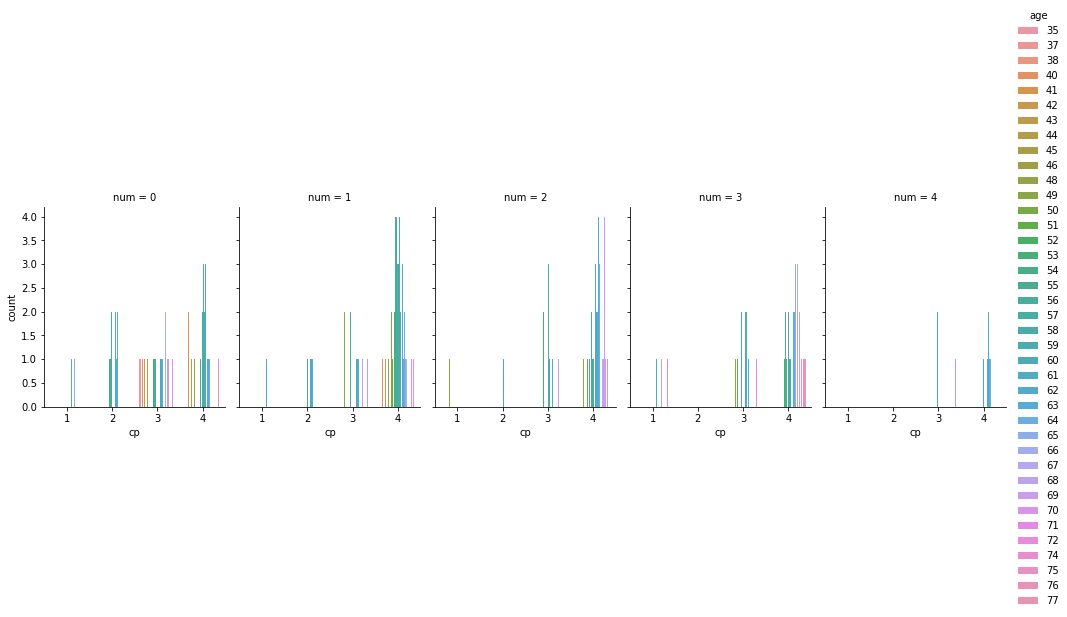

In [39]:
graph= sns.catplot(x="cp", hue="age", col="num", data=df, kind="count",height=3.5, aspect=0.8)

type 4 'Asymptomatic' chest pain often caused because of heart disease when compared with the other types of chest pain

In [40]:
df.groupby(["num"])["trestbps"].min().astype(str) + ', ' +  df.groupby(["num"])["trestbps"].max().astype(str)

num
0    100.0, 180.0
1     96.0, 180.0
2    110.0, 170.0
3      0.0, 172.0
4    104.0, 190.0
Name: trestbps, dtype: object

min blood pressure to maximum blood pressure

In [41]:
df.groupby(["num", ])["trestbps"].mean()

num
0    129.941176
1    130.928571
2    135.219512
3    132.976190
4    145.400000
Name: trestbps, dtype: float64

blood pressure as per disease type

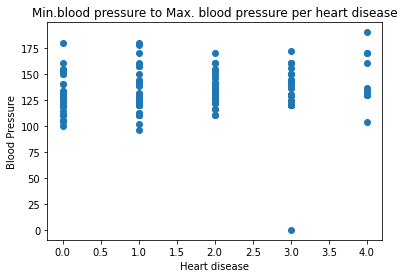

In [42]:
plt.xlabel("Heart disease")
plt.ylabel("Blood Pressure")
plt.title("Min.blood pressure to Max. blood pressure per heart disease")
plt.scatter(df['num'], df['trestbps'])
plt.show()

People who do not have heart disease their bp range is min(100)and max(180)


In [43]:
df.groupby(["num"])["chol"].min().astype(str) + ', ' +  df.groupby(["num"])["chol"].max().astype(str)

num
0    139.0, 458.0
1    100.0, 349.0
2    153.0, 384.0
3    142.0, 369.0
4    170.0, 287.0
Name: chol, dtype: object

min. and max. cholestrol level

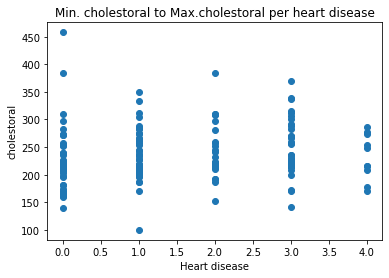

In [44]:
plt.xlabel("Heart disease")
plt.ylabel("cholestoral")
plt.title("Min. cholestoral to Max.cholestoral per heart disease")
plt.scatter(df['num'], df['chol'])
plt.show()


person who do not have heart disease their Cholestoral level range is min(139)and max(458)
Person who have heart disease and catagorised in range of 1 to 4 are:

        type 1 - min(100) and max(349)
        type 2 - min(153) and max(384)
        type 3 - min(142) and max(369)
        type 4 - min(170) and max(287)

In [45]:
df.groupby(["num"])["thalach"].min().astype(str) + ', ' +  df.groupby(["num"])["thalach"].max().astype(str)

num
0    69.0, 180.0
1    93.0, 165.0
2    84.0, 180.0
3    73.0, 160.0
4    84.0, 150.0
Name: thalach, dtype: object

Min.Heart Rate to Max.Heart Rate per heart disease

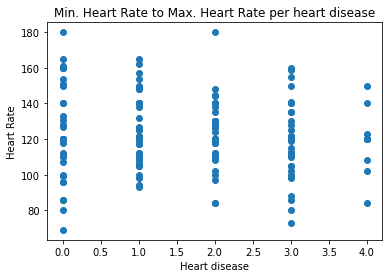

In [46]:
plt.xlabel("Heart disease")
plt.ylabel("Heart Rate")
plt.title("Min. Heart Rate to Max. Heart Rate per heart disease")
plt.scatter(df['num'], df['thalach'])
plt.show()


Person who do not have heart disease their Heart Rate level range is min(69)
and max(180)
Person who have heart disease and catagorised in range of 1 to 4 are:

        type 1 - min(93) and max(165)
        type 2 - min(84) and max(180)
        type 3 - min(73) and max(160)
        type 4 - min(84) and max(150)

# observation

 A man with age greater than 38 years, chest pain type 4, Blood pressure more than 130, Cholestoral level more than 230, Heart rate more than 123 and Blood Pressure more than 130 have more chances of heart disease as per our observations from the above analysis

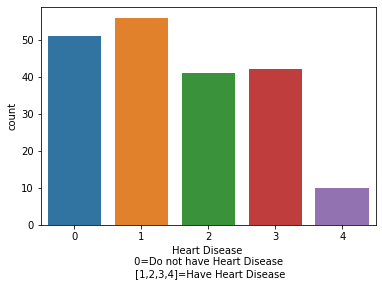

In [47]:
sns.countplot(x='num',data=df)
plt.xlabel("Heart Disease \n 0=Do not have Heart Disease \n [1,2,3,4]=Have Heart Disease")
plt.show()

# Multivariate analysis

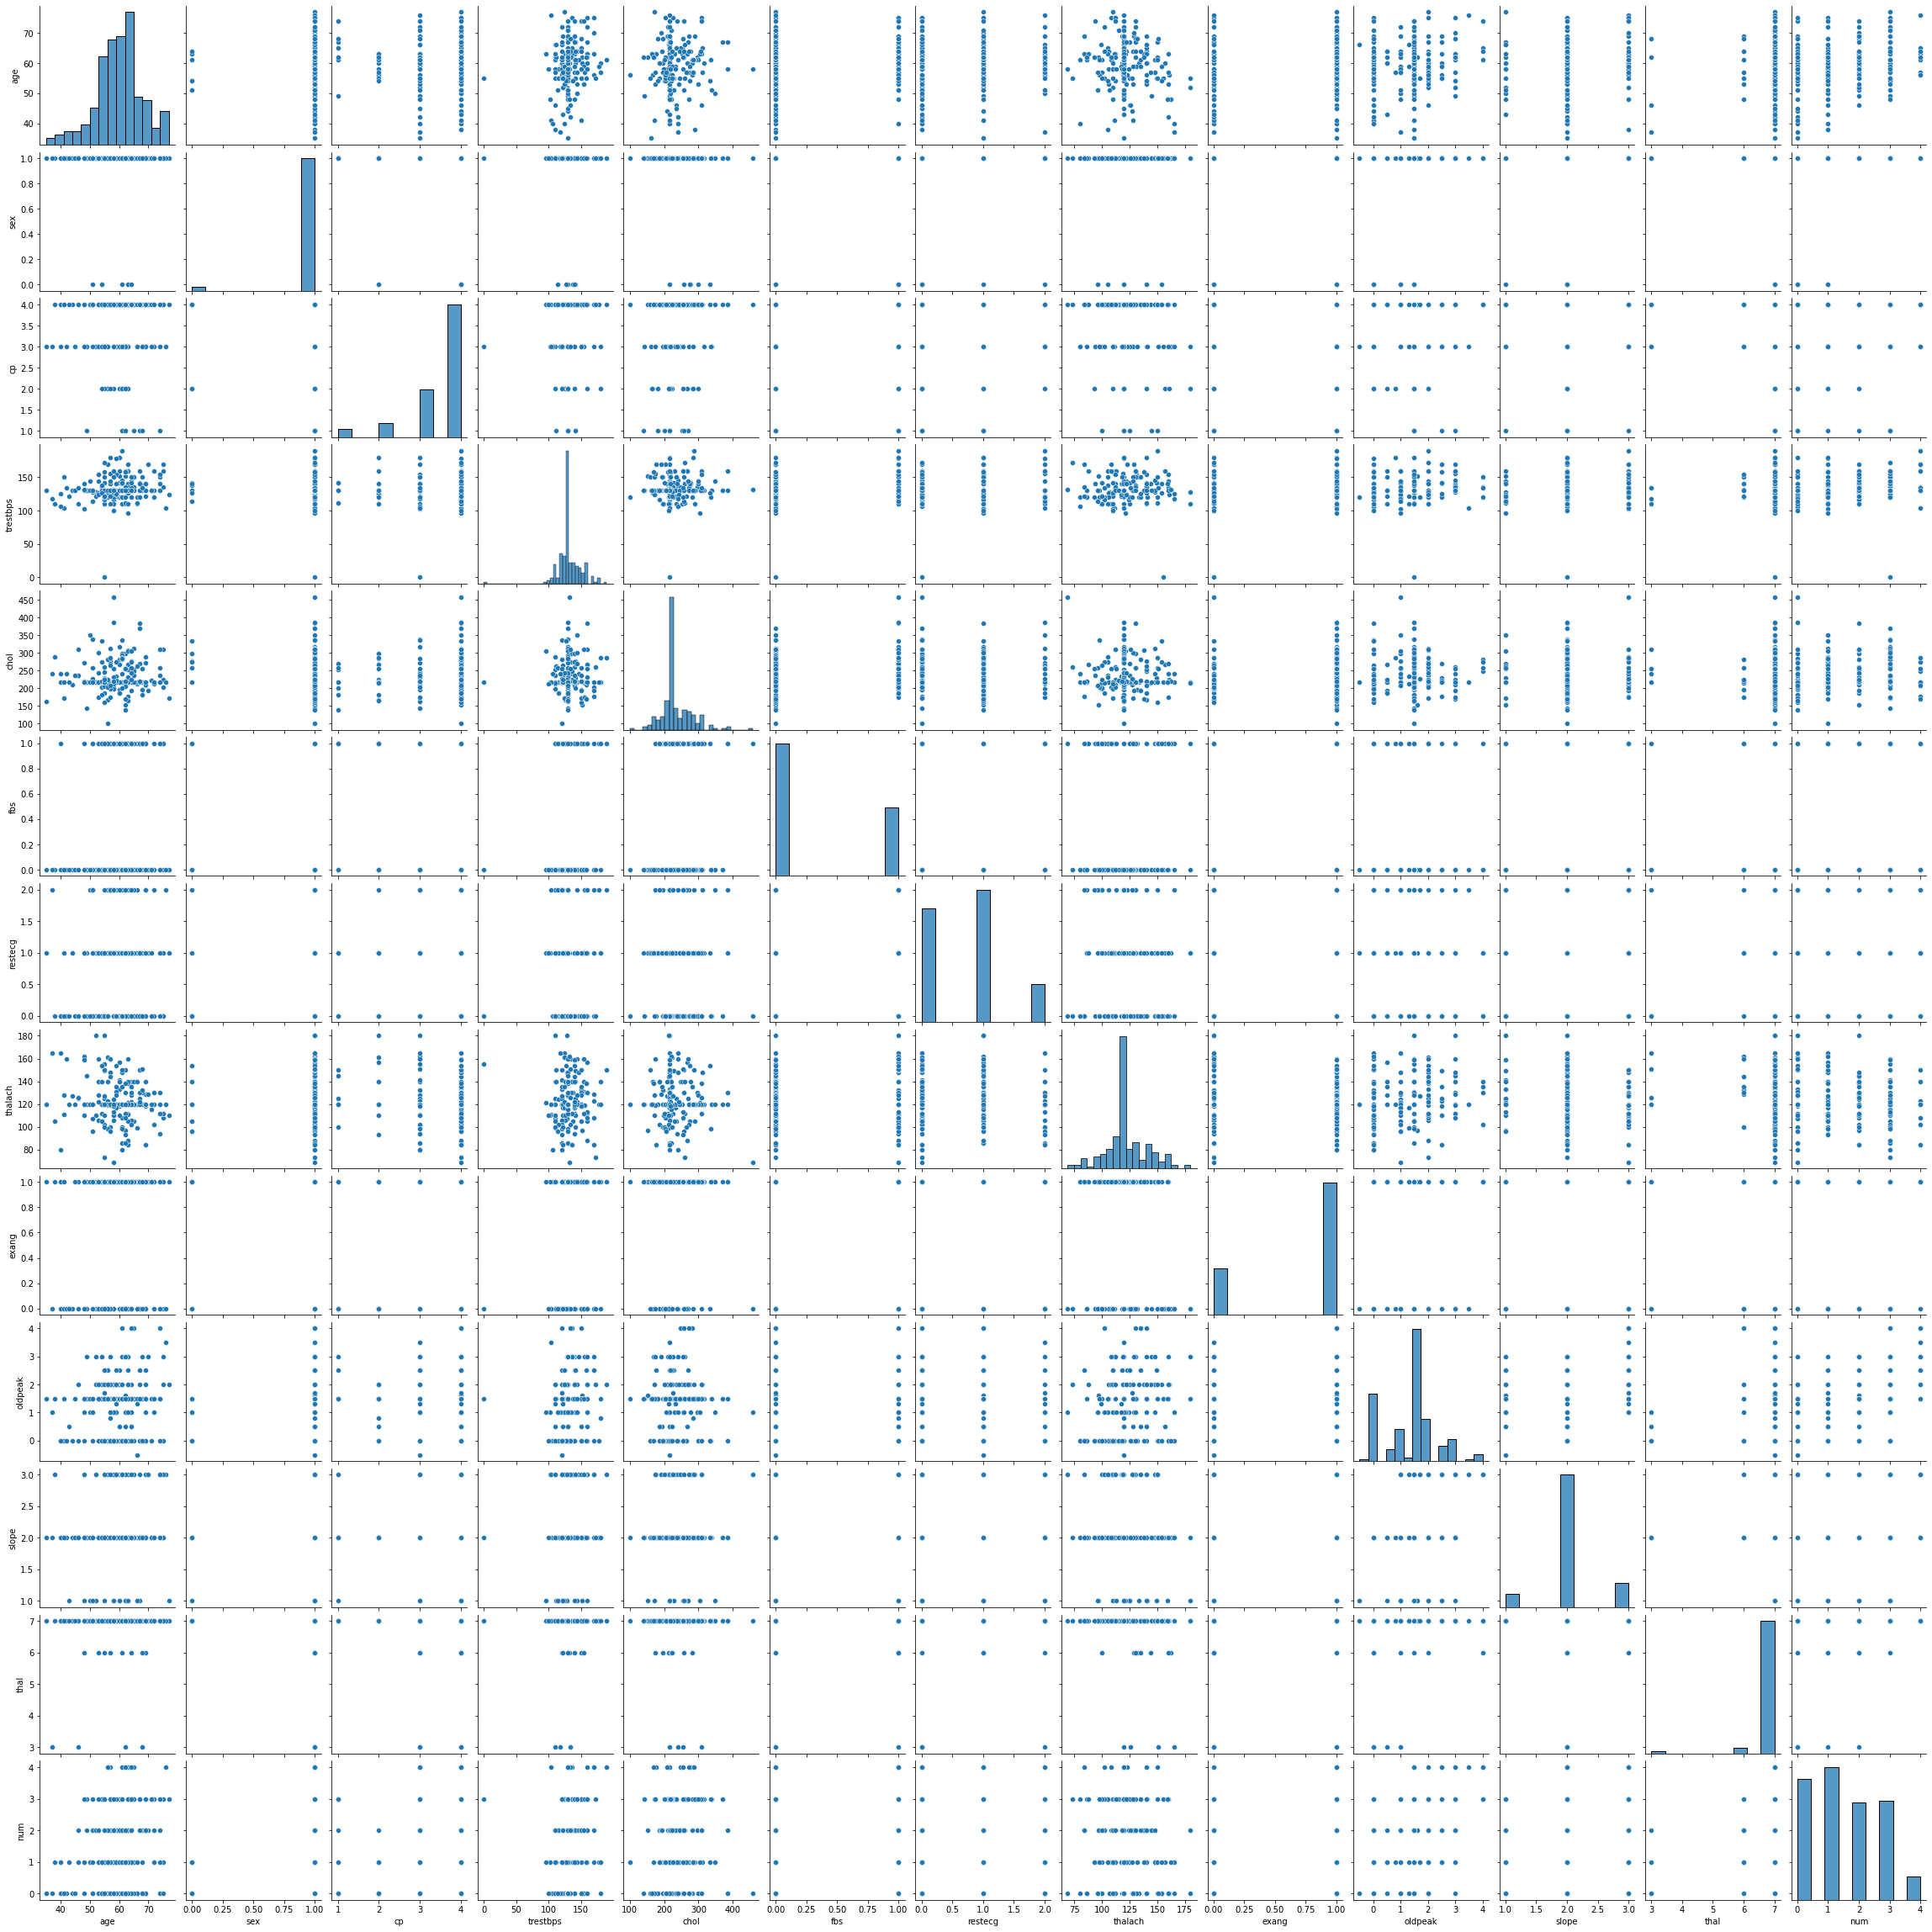

In [48]:
sns.pairplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'thal'}>],
       [<AxesSubplot:title={'center':'num'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

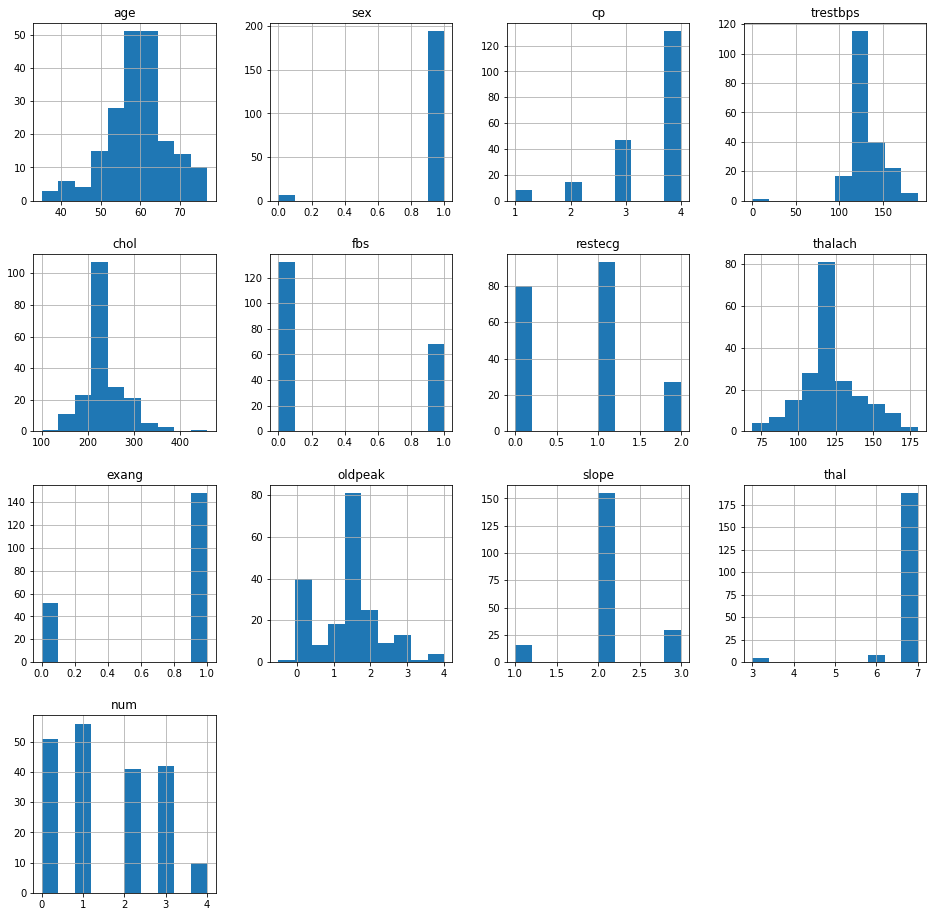

In [49]:
df.hist(figsize=(16,16))

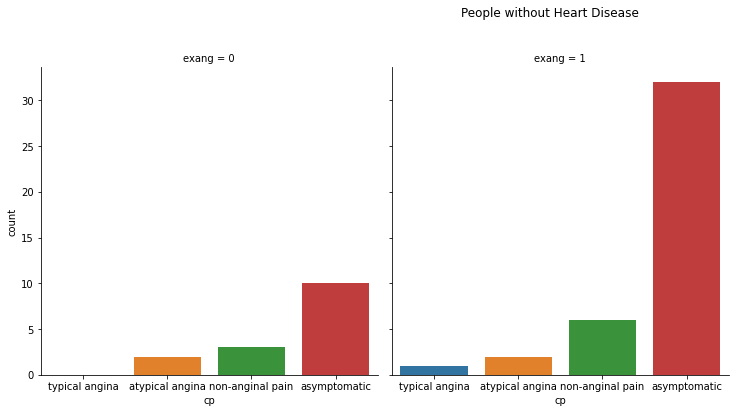

In [50]:
graph= sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['num'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
graph.fig.suptitle('People without Heart Disease', y =1.1)

plt.show()

the exercise induces angina is most common for type 4 asymptomatic chest pain

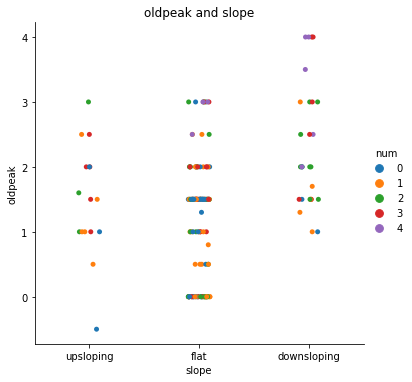

In [52]:
sns.catplot(x = "slope", y = "oldpeak", hue = "num", data = df)
plt.title('oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()


downslloping 'slope' have higher value of ST Depression 'oldpeak'

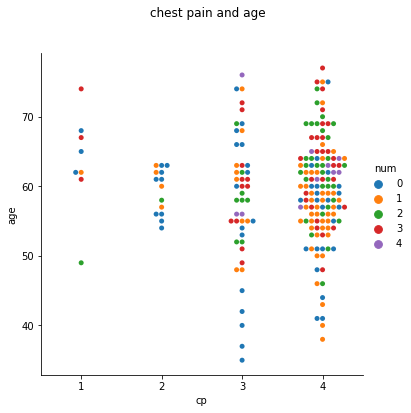

In [53]:
graph= sns.catplot(x = 'cp', y = 'age', hue = 'num', data = df, kind="swarm")
graph.fig.suptitle('chest pain and age', y = 1.1)
plt.show()

50 to 70 age of people with chest pain have higer risk of having heart disease

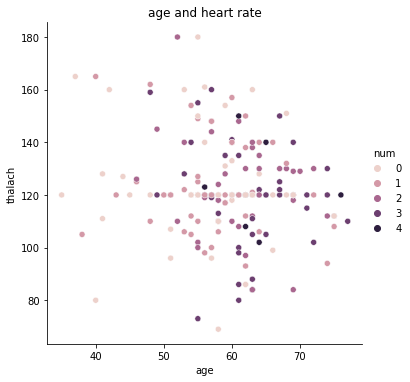

In [54]:
sns.relplot(x = 'age', y = 'thalach', data = df, hue = 'num', legend="full")
plt.title('age and heart rate')
plt.show()

age growth increase the chances of getting heart disease 

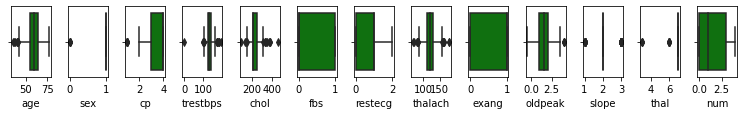

In [55]:
collist=df.columns.values
ncol=20
nrow=13
plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Treating outliers

In [57]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
dfoutliers=df.loc[(z_score<3).all(axis=1)]
print(dfoutliers.shape)

(200, 13)
(174, 13)


In [58]:
df=dfoutliers

In [59]:
df.shape

(174, 13)

In [60]:
df.skew() #checking skewness

age        -0.254285
sex         0.000000
cp         -1.413005
trestbps    0.700258
chol        0.762527
fbs         0.797984
restecg     0.368572
thalach     0.130636
exang      -1.256722
oldpeak     0.258510
slope       0.249861
thal       -4.373481
num         0.251811
dtype: float64

In [61]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [62]:
df.skew()

age        -0.254285
sex         0.000000
cp         -1.413005
trestbps    0.301326
chol       -0.207457
fbs         0.797984
restecg     0.368572
thalach     0.130636
exang      -1.256722
oldpeak     0.258510
slope       0.249861
thal       -4.373481
num         0.251811
dtype: float64

treated skewness

# Data Preparation for Model Training

Classification type of probem and we have to predict which patient have heart diseases or not based on the results. So we can combine the types of heart disease which are type 1 to 4.

In [63]:
df.loc[:, "heart disease"] = df.loc[:, "num"].apply(lambda x: 1 if x >= 1 else 0)

if "Num" == 0, people do not have heart disease -  '0'
if "Num" >= 1, peopel have heart disease- we can impute 1

In [64]:
x = df.drop(['heart disease','num'],axis=1)
y = df['heart disease']

In [65]:
x.shape

(174, 12)

In [66]:
y.shape

(174,)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train=pd.DataFrame(x_train,columns=x.columns)

scaled data

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [69]:
x_train.shape

(121, 12)

In [70]:
y_train.shape

(121,)

In [71]:
x_test.shape

(53, 12)

In [72]:
y_test.shape

(53,)

In [73]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [74]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('accuracy score',accuracy_score(y_test,predlr))
print('confusion matrix',confusion_matrix(y_test,predlr))
print('classification report',classification_report(y_test,predlr))

accuracy score 0.8113207547169812
confusion matrix [[ 1  7]
 [ 3 42]]
classification report               precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.86      0.93      0.89        45

    accuracy                           0.81        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.77      0.81      0.78        53



In [75]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print('a r',accuracy_score(y_test,predgnb))
print ('cn rep',confusion_matrix(y_test,predgnb))
print('cls reprt',classification_report(y_test,predgnb))

a r 0.7358490566037735
cn rep [[ 3  5]
 [ 9 36]]
cls reprt               precision    recall  f1-score   support

           0       0.25      0.38      0.30         8
           1       0.88      0.80      0.84        45

    accuracy                           0.74        53
   macro avg       0.56      0.59      0.57        53
weighted avg       0.78      0.74      0.76        53



In [76]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8490566037735849
[[ 0  8]
 [ 0 45]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.85      1.00      0.92        45

    accuracy                           0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53



In [77]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.660377358490566
[[ 3  5]
 [13 32]]
              precision    recall  f1-score   support

           0       0.19      0.38      0.25         8
           1       0.86      0.71      0.78        45

    accuracy                           0.66        53
   macro avg       0.53      0.54      0.52        53
weighted avg       0.76      0.66      0.70        53



In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.7924528301886793
[[ 2  6]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.29      0.25      0.27         8
           1       0.87      0.89      0.88        45

    accuracy                           0.79        53
   macro avg       0.58      0.57      0.57        53
weighted avg       0.78      0.79      0.79        53



In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.7547169811320755
[[ 3  5]
 [ 8 37]]
              precision    recall  f1-score   support

           0       0.27      0.38      0.32         8
           1       0.88      0.82      0.85        45

    accuracy                           0.75        53
   macro avg       0.58      0.60      0.58        53
weighted avg       0.79      0.75      0.77        53



In [85]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(criterion = "entropy", random_state =100,max_depth=3, min_samples_leaf=5)
etc.fit(x_train,y_train)
etc.score(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8490566037735849
[[ 0  8]
 [ 0 45]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.85      1.00      0.92        45

    accuracy                           0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53



In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7358490566037735
[[ 0  8]
 [ 6 39]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.83      0.87      0.85        45

    accuracy                           0.74        53
   macro avg       0.41      0.43      0.42        53
weighted avg       0.70      0.74      0.72        53



In [87]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
adb.score(x_train,y_train)
predadb=adb.predict(x_test)
print(accuracy_score(y_test,predadb))
print(confusion_matrix(y_test,predadb))
print(classification_report(y_test,predadb))

0.6415094339622641
[[ 4  4]
 [15 30]]
              precision    recall  f1-score   support

           0       0.21      0.50      0.30         8
           1       0.88      0.67      0.76        45

    accuracy                           0.64        53
   macro avg       0.55      0.58      0.53        53
weighted avg       0.78      0.64      0.69        53



# Logistic regression has performed well as the model accuracy for test and train data is very close and around 84%.

In [90]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [91]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.6156471 , 0.85920459, 0.76660585, 0.5190001 , 0.93129969,
       0.77633576, 0.87778037, 0.93349263, 0.66931921, 0.8748108 ,
       0.75202261, 0.77981008, 0.74992979, 0.90823374, 0.74091947,
       0.26937546, 0.91416064, 0.84162902, 0.85290255, 0.75864485,
       0.93560171, 0.77227979, 0.78482409, 0.92845539, 0.84572446,
       0.89394445, 0.90017002, 0.52188673, 0.74725158, 0.80254965,
       0.9250211 , 0.77340938, 0.7497432 , 0.81331539, 0.7599    ,
       0.49325273, 0.88305   , 0.7623834 , 0.25982854, 0.78954282,
       0.83492205, 0.85736295, 0.5999456 , 0.79480341, 0.6513907 ,
       0.54155773, 0.93840115, 0.86262518, 0.97069299, 0.76894379,
       0.91841971, 0.83965477, 0.37096424])

In [92]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

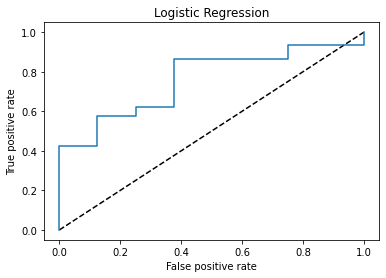

In [93]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label= 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [94]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.5291666666666667


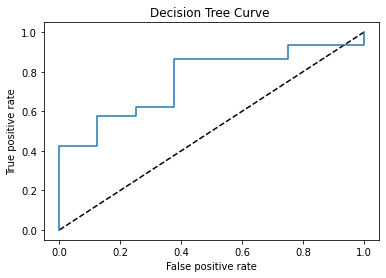

In [95]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label= 'Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Curve ')
plt.show()

In [96]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

0.5430555555555556


# Saving the model

In [98]:
import joblib
joblib.dump(lr,'heart_disease.pkl')

['heart_disease.pkl']